# Brooklyn Bridge Data Analysis

Exploratory analysis of Brooklyn Bridge data from [NYC OpenData: Brooklyn Bridge Automated Pedestrian Counts Demonstration Project](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta).

### 0. Import data and necessary Python libraries

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from matplotlib import colors as mcolors
import datetime

In [297]:
bridge = pd.read_csv('/Users/kristinlee/Documents/nyc_data/brooklyn_bridge_ped.csv')

### 1. Inspect data

Dataset contains hourly information of number of pedestrians (to/from Manhattan) along with other climatic variables.

In [298]:
bridge.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,10/01/2017 12:00:00 AM,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,10/01/2017 01:00:00 AM,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,10/01/2017 02:00:00 AM,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,10/01/2017 03:00:00 AM,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,10/01/2017 04:00:00 AM,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [299]:
bridge.dtypes

hour_beginning        object
location              object
Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
lat                  float64
long                 float64
events                object
Location1             object
dtype: object

### 2. Aggregate daily data to condense dataset
#### Create new column 'days' from the date/time in 'hour_beginning' by removing time.

In [300]:
days = bridge['hour_beginning'].str.split().str.get(0)
days[:10]

0    10/01/2017
1    10/01/2017
2    10/01/2017
3    10/01/2017
4    10/01/2017
5    10/01/2017
6    10/01/2017
7    10/01/2017
8    10/01/2017
9    10/01/2017
Name: hour_beginning, dtype: object

In [301]:
bridge['days'] = days
bridge.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,days
0,10/01/2017 12:00:00 AM,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",10/01/2017
1,10/01/2017 01:00:00 AM,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",10/01/2017
2,10/01/2017 02:00:00 AM,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",10/01/2017
3,10/01/2017 03:00:00 AM,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",10/01/2017
4,10/01/2017 04:00:00 AM,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",10/01/2017


#### Group data by day and get total number of pedestrians, total percipitation (in inches), and average temperature (in Fahrenheit degrees).

In [302]:
bridge_per_day = bridge.groupby('days', as_index=False).agg(
    {'Pedestrians': 'sum',
     'precipitation': 'sum',
     'temperature': 'mean'
    }
)

bridge_per_day.head()

,days,Pedestrians,precipitation,temperature
0,01/01/2018,16445,0.0000,12.041667
1,01/02/2018,16188,0.0002,17.875000
2,01/03/2018,16163,0.0189,21.041667
3,01/04/2018,1623,0.1127,23.750000
4,01/05/2018,5539,0.0061,12.708333


### 3. Vizualize data
#### Plot correlation matrix for all variables.

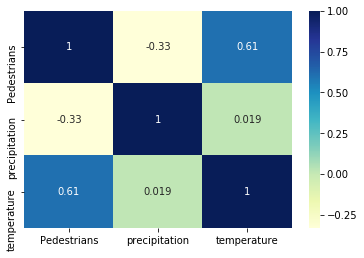

In [303]:
sns.heatmap(bridge_per_day.corr(), annot=True, cmap='YlGnBu')

#### Plot variables against eachother.

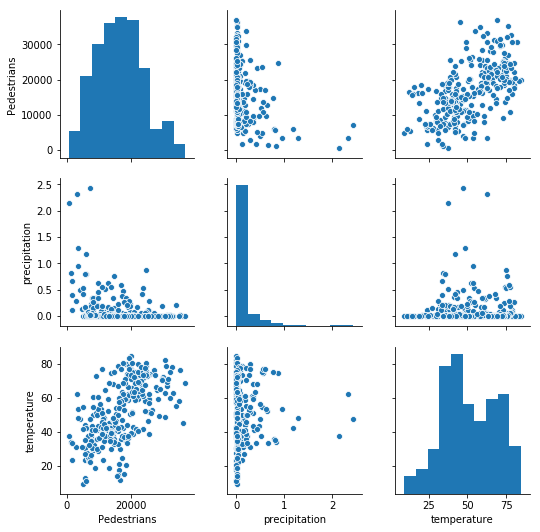

In [304]:
sns.pairplot(bridge_per_day)

### 4. Can we predict number of pedestrians per day based on average daily temperature?

#### Split data into training/test data where training set is 80% of all data.

In [313]:
y = bridge_per_day['Pedestrians']
X = bridge_per_day['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [314]:
#get length of each training and test 
print(X_train.shape, X_test.shape)

(243,) (61,)


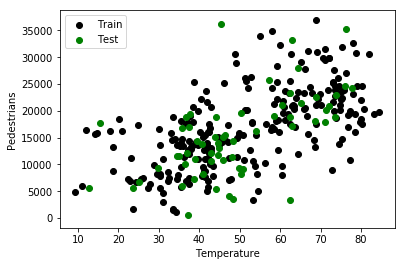

In [315]:
#want to double check that randomly sampled
plt.scatter(X_train,y_train,color='k')
plt.scatter(X_test,y_test,color='g')
plt.legend(('Train','Test'))
plt.xlabel('Temperature')
plt.ylabel('Pedestrians')
plt.show()

#### Build linear model and predict number of pedestrians for test data.

In [316]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train.values.reshape(-1, 1), y_train)

Make predictions on test data and plot.

In [317]:
predictions = lm.predict(X_test.values.reshape(-1, 1))

Text(0, 0.5, 'Predictions')

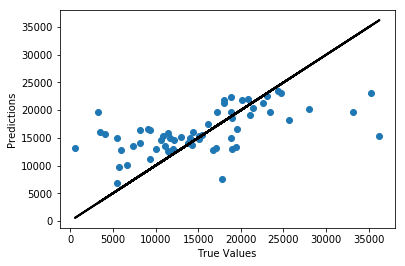

In [338]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color='black', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')


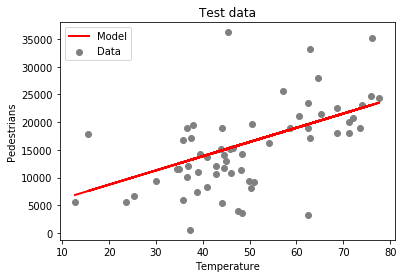

In [327]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.xlabel('Temperature')
plt.ylabel('Pedestrians')
plt.title(('Test data'))
plt.legend(('Model','Data'))
plt.show()

Evaluate and explore model.

In [328]:
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('R^2 (coefficient of determination): %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [256.5614298]
Mean squared error: 39732829.31
R^2 (coefficient of determination): 0.32


### 5. Use multiple linear regression model with both daily total precipitation and average temperature as predictors.
#### Split data into training/test data where training set is 80% of all data.

In [329]:
y = bridge_per_day['Pedestrians']
X_2 = bridge_per_day[['precipitation', 'temperature']]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2)

#### Build linear model and predict number of pedestrians for test data.

In [331]:
lm_2 = linear_model.LinearRegression()
model_2 = lm_2.fit(X_train_2, y_train_2)

In [332]:
predictions_2 = lm_2.predict(X_test_2)

Text(0, 0.5, 'Predictions')

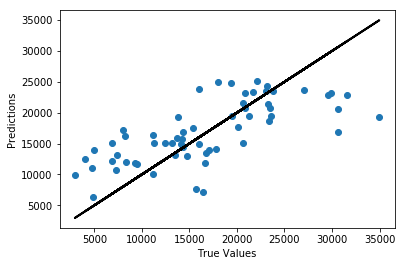

In [339]:
plt.scatter(y_test_2, predictions_2)
plt.plot(y_test_2, y_test_2, color='black', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Evaluate and explore model.

In [335]:
print('Coefficients: \n', model_2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_2, predictions_2))
# Explained variance score: 1 is perfect prediction
print('R^2 (coefficient of determination): %.2f' % r2_score(y_test_2, predictions_2))

Coefficients: 
 [-8217.11150025   266.33473985]
Mean squared error: 30109396.72
R^2 (coefficient of determination): 0.48


Using both predictors gives a better R<sup>2</sup>.

### 6. More data vizualization

Get a color palette.

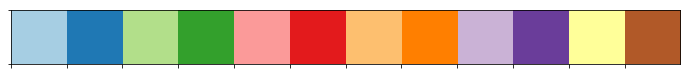

In [231]:
colors = sns.color_palette("Paired")
sns.palplot(sns.color_palette("Paired"))

#### Plot number of pedestrians and total precipitation per day on same plot.

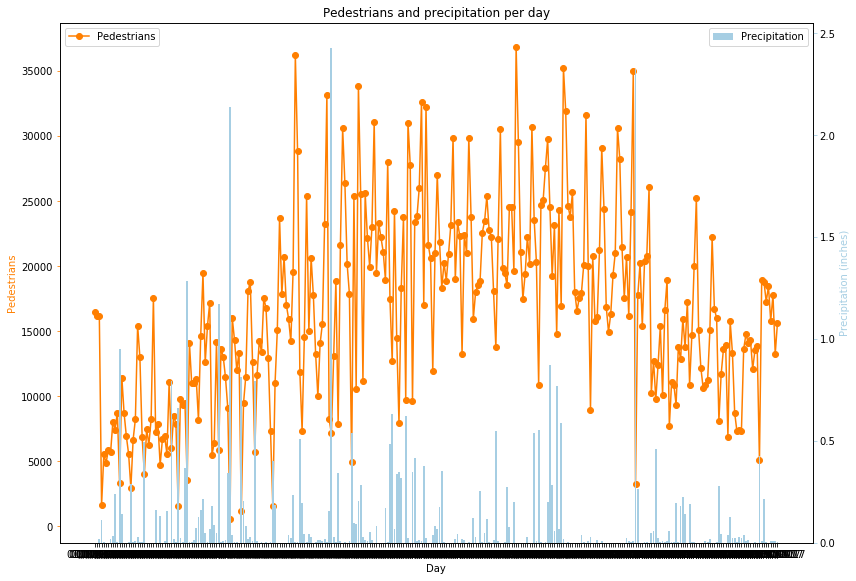

In [454]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(bridge_per_day['days'], bridge_per_day['Pedestrians'], 'o-', color = colors[7], label = 'Pedestrians')
ax1.set_xlabel('Day')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Pedestrians', color = colors[7])
ax1.tick_params('y', color = colors[7])
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(bridge_per_day['days'], bridge_per_day['precipitation'], color=colors[0], label ='Precipitation')
ax2.set_ylabel('Precipitation (inches)', color=colors[0])
ax2.tick_params('y', color=colors[0])

fig.tight_layout()
plt.title('Pedestrians and precipitation per day')


plt.legend(loc='upper right')
plt.show()


#### Plot number of pedestrians and average temperature per day on same plot.

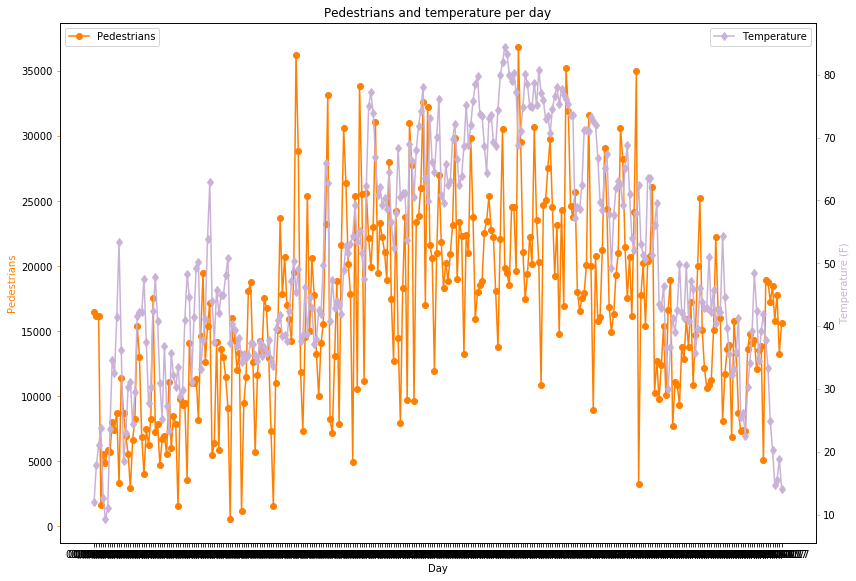

In [455]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(bridge_per_day['days'], bridge_per_day['Pedestrians'], 'o-', color = colors[7], label = 'Pedestrians')
ax1.set_xlabel('Day')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Pedestrians', color = colors[7])
ax1.tick_params('y', color = colors[7])
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(bridge_per_day['days'], bridge_per_day['temperature'], 'd-', color=colors[8], label ='Temperature')
ax2.set_ylabel('Temperature (F)', color=colors[8])
ax2.tick_params('y', color=colors[8])

fig.tight_layout()

plt.legend(loc='upper right')
plt.title('Pedestrians and temperature per day')

plt.show()

We can see some correlation between very rainy days and a decreased number of pedestrians. We also see daily verage temperature nicely tracks number of pedestrians (and maybe some impact on decreased number of pedestrians when the temperature is at its highest). It would be interesting to fit other models (non-linear) to see if we can better predict number of pedestrians.

### 7. Vizualize data by month

Some of the trends are difficult to see with so many data points so want to look at monthly patterns.

#### Parse month from datetime data.

In [373]:
date_time = pd.to_datetime(bridge['hour_beginning'])
date_time[:10]

0   2017-10-01 00:00:00
1   2017-10-01 01:00:00
2   2017-10-01 02:00:00
3   2017-10-01 03:00:00
4   2017-10-01 04:00:00
5   2017-10-01 05:00:00
6   2017-10-01 06:00:00
7   2017-10-01 07:00:00
8   2017-10-01 08:00:00
9   2017-10-01 09:00:00
Name: hour_beginning, dtype: datetime64[ns]

In [440]:
#months = pd.DatetimeIndex(date_time).month
months = date_time.dt.strftime('%B')
months[:10]

0    October
1    October
2    October
3    October
4    October
5    October
6    October
7    October
8    October
9    October
Name: hour_beginning, dtype: object

In [442]:
months.unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April', 'May', 'June', 'July'], dtype=object)

Create new column for months in dataset and get total rainfall, number of pedestrians, and average temperature per month.

In [441]:
bridge['months'] = months
bridge_per_month = bridge.groupby('months').agg(
    {'Pedestrians': 'sum',
     'precipitation': 'sum',
     'temperature': 'mean'
    }
)

bridge_per_month

,Pedestrians,precipitation,temperature
months,,,
April,534353,5.1282,47.484722
December,421567,1.3512,33.935484
February,284844,5.5436,40.011905
January,255894,2.6622,30.419355
July,724792,4.5544,76.467742
June,648870,1.9297,70.450000
March,429697,5.3803,38.742934
May,661496,4.4273,64.799462
November,432509,1.6465,45.498611


In [443]:
reorder_list = months.unique()
bridge_per_month = bridge_per_month.reindex(reorder_list)
bridge_per_month['months'] = reorder_list
bridge_per_month

,Pedestrians,precipitation,temperature,months
months,,,,
October,627670,2.7475,62.077957,October
November,432509,1.6465,45.498611,November
December,421567,1.3512,33.935484,December
January,255894,2.6622,30.419355,January
February,284844,5.5436,40.011905,February
March,429697,5.3803,38.742934,March
April,534353,5.1282,47.484722,April
May,661496,4.4273,64.799462,May
June,648870,1.9297,70.450000,June


#### Again, plot number of pedestrians and total precipitation/average temperature per day on same plot.

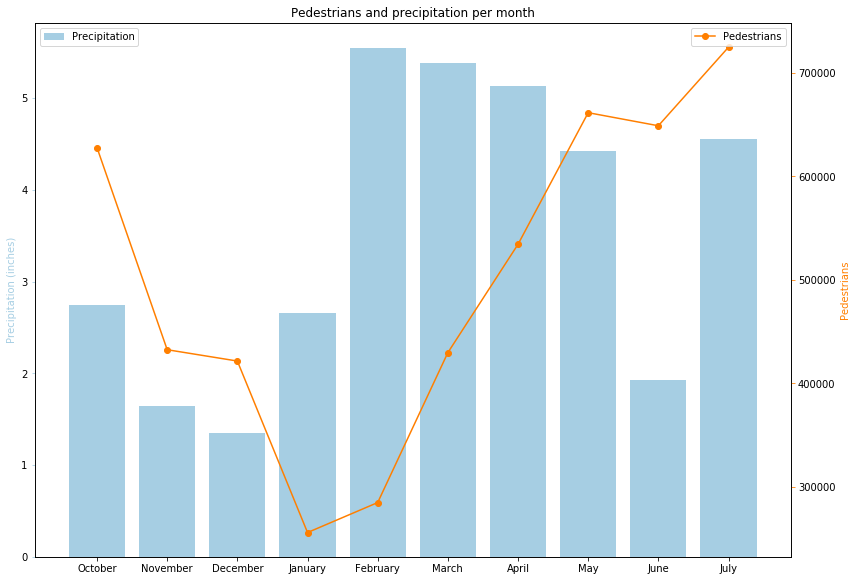

In [456]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(bridge_per_month['months'], bridge_per_month['precipitation'], color=colors[0], label ='Precipitation')
ax1.set_ylabel('Precipitation (inches)', color=colors[0])
ax1.tick_params('y', color=colors[0])
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(bridge_per_month['months'], bridge_per_month['Pedestrians'], 'o-', color = colors[7], label = 'Pedestrians')
# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Pedestrians', color = colors[7])
ax2.tick_params('y', color = colors[7])


fig.tight_layout()

plt.legend(loc='upper right')
plt.title('Pedestrians and precipitation per month')
plt.show()


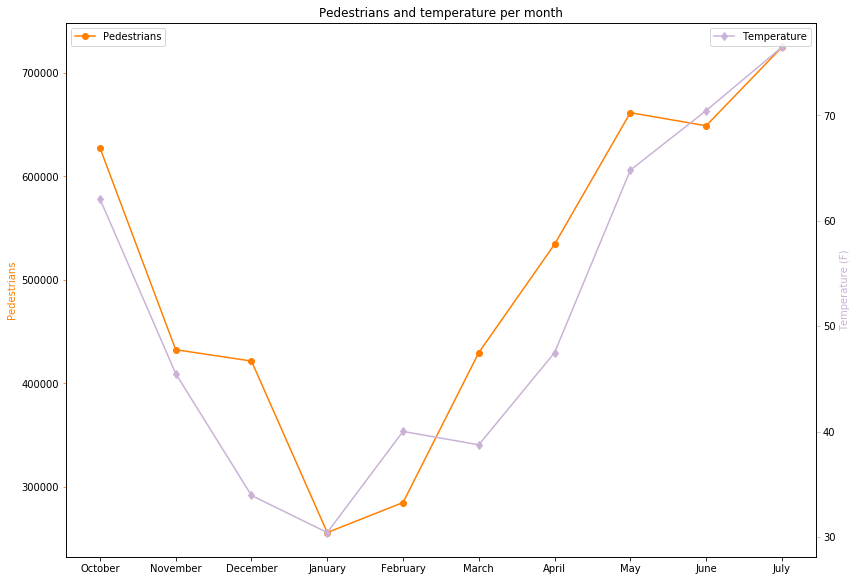

In [457]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(bridge_per_month['months'], bridge_per_month['Pedestrians'], 'o-', color = colors[7], label = 'Pedestrians')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Pedestrians', color = colors[7])
ax1.tick_params('y', color = colors[7])
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(bridge_per_month['months'], bridge_per_month['temperature'], 'd-', color=colors[8], label ='Temperature')
ax2.set_ylabel('Temperature (F)', color=colors[8])
ax2.tick_params('y', color=colors[8])

fig.tight_layout()

plt.legend(loc='upper right')
plt.title('Pedestrians and temperature per month')
plt.show()

Again, average temperature and number of pedestrians show similar patterns. However, it is difficult to see patterns in the total rainfall. This may be because there are more pedestrians in the spring/summer months (due to generally nicer weather) even though these months have more rainfall than fall/winter months. Daily variation is likely much more important.

### 7. Vizualize data from spring 2018 only.

Because daily variation matters and spring seems like a highly variable time, I will just focus on spring 2018. I get this data and again plot number of pedestrians and total precipitation/average temperature per day on same plot.

In [449]:
start_date = '2018-03-20'
end_date = '2018-06-21'
spring_2018 = bridge[(date_time >= start_date) & (date_time <= end_date)]
spring_2018_per_day = spring_2018.groupby('days', as_index=False).agg(
    {'Pedestrians': 'sum',
     'precipitation': 'sum',
     'temperature': 'mean'
    }
)

spring_2018_per_day.head()

,days,Pedestrians,precipitation,temperature
0,03/20/2018,7359,0.0034,34.458333
1,03/21/2018,1601,0.4010,33.625000
2,03/22/2018,11023,0.1859,39.625000
3,03/23/2018,15068,0.0000,41.000000
4,03/24/2018,23702,0.0000,41.708333


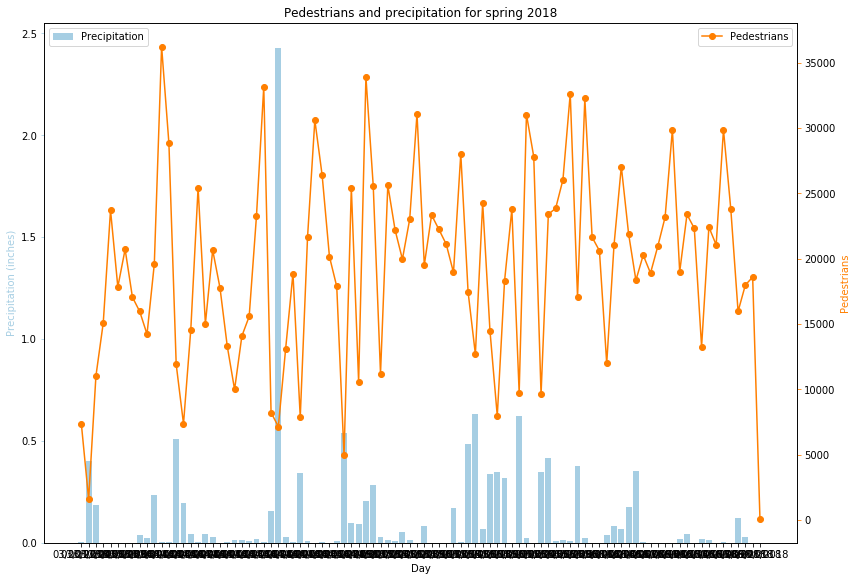

In [460]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(spring_2018_per_day['days'], spring_2018_per_day['precipitation'], color=colors[0], label ='Precipitation')
ax1.set_ylabel('Precipitation (inches)', color=colors[0])
ax1.tick_params('y', color=colors[0])
ax1.set_xlabel('Day')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(spring_2018_per_day['days'], spring_2018_per_day['Pedestrians'], 'o-', color = colors[7], label = 'Pedestrians')
# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Pedestrians', color = colors[7])
ax2.tick_params('y', color = colors[7])


fig.tight_layout()

plt.legend(loc='upper right')
plt.title('Pedestrians and precipitation for spring 2018')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(spring_2018_per_day['days'], spring_2018_per_day['Pedestrians'], 'o-', color = colors[7], label = 'Pedestrians')
ax1.set_xlabel('Day')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Pedestrians', color = colors[7])
ax1.tick_params('y', color = colors[7])
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(spring_2018_per_day['days'], spring_2018_per_day['temperature'], 'd-', color=colors[8], label ='Temperature')
ax2.set_ylabel('Temperature (F)', color=colors[8])
ax2.tick_params('y', color=colors[8])

fig.tight_layout()

plt.legend(loc='upper right')
plt.title('Pedestrians and temperature for spring 2018')
plt.show()